In [1]:
import pandas as pd
file_path = "../PYTHON ESERCIZI/owid-covid-data.csv"
covid_db = pd.read_csv(file_path)

Si richiede di verificare le dimensioni del dataset e i relativi metadati;

In [3]:
covid_db.shape

(387302, 67)

In [5]:
covid_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387302 entries, 0 to 387301
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387302 non-null  object 
 1   continent                                   368758 non-null  object 
 2   location                                    387302 non-null  object 
 3   date                                        387302 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [2]:
covid_db.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; 
si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [4]:
covid_db.groupby("continent")["new_cases"].sum()

continent
Africa            13141282.0
Asia             301446461.0
Europe           252376812.0
North America    124530643.0
Oceania           14808170.0
South America     68718448.0
Name: new_cases, dtype: float64

VERIFICANDO IL DATASET LE RIGHE CON CONTINENTE VUOTO  RIASSUMONO STATISTICHE PER CONTINENTE, MONDO E REDDITO. CONSIDERATO CHE NON VIENE VISUALIZZATO NEL CALCOLO, NON LO GESTISCO

Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [73]:
continente_1 = input("Inserire continente_1: ")
continente_2 = input("Inserire continente_2: ")
continente_1_max = covid_db[covid_db["location"] == (continente_1)]["new_cases"].max()
continente_1_mean = covid_db[covid_db["location"] == (continente_1)]["new_cases"].mean()
continente_1_tot = covid_db[covid_db["location"] == (continente_1)]["new_cases"].sum()
continente_2_max = covid_db[covid_db["location"] == (continente_2)]["new_cases"].max()
continente_2_mean = covid_db[covid_db["location"] == (continente_2)]["new_cases"].mean()
continente_2_tot = covid_db[covid_db["location"] == (continente_2)]["new_cases"].sum()
world_max = covid_db[covid_db["location"] == "World"]["new_cases"].max()
world_mean = covid_db[covid_db["location"] == "World"]["new_cases"].mean()
world_tot = covid_db[covid_db["location"] == "World"]["new_cases"].sum()
perc_tot1 = continente_1_tot / world_tot
perc_tot2 = continente_2_tot / world_tot

data = {(continente_1): [(continente_1_max), (continente_1_mean), (perc_tot1)],
        (continente_2): [(continente_2_max), (continente_2_mean), (perc_tot2)]}

statistiche = pd.DataFrame(data, index=["Casi giornalieri max", "Media giornaliera", "% vs Tot World"])

statistiche

Inserire continente_1:  Asia
Inserire continente_2:  Africa


,Asia,Africa
Casi giornalieri max,4.214242e+07,316014.000000
Media giornaliera,1.965101e+05,8566.676662
% vs Tot World,3.889519e-01,0.016956


Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

In [11]:
covid_db["date"] = pd.to_datetime(covid_db["date"])

In [12]:
covid_db.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [13]:
covid_db["yearday"] = covid_db["date"].dt.dayofyear

In [14]:
covid_db["year"] = covid_db["date"].dt.year

In [24]:
italy22 = covid_db[(covid_db["location"] == "Italy") & (covid_db["year"] == 2022)]
totale_italy22 = italy22["new_cases"].sum()
totale_italy22

19438072.0

In [26]:
import seaborn as sns

C:\Users\zobom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zobom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='yearday', ylabel='total_cases'>

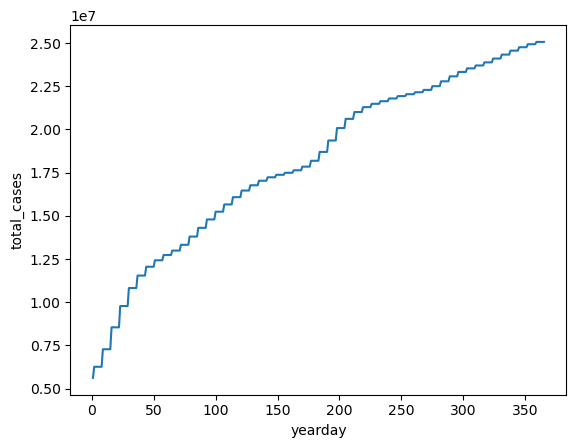

In [28]:
sns.lineplot(data=italy22, x="yearday", y = "total_cases")

C:\Users\zobom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zobom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='yearday', ylabel='new_cases'>

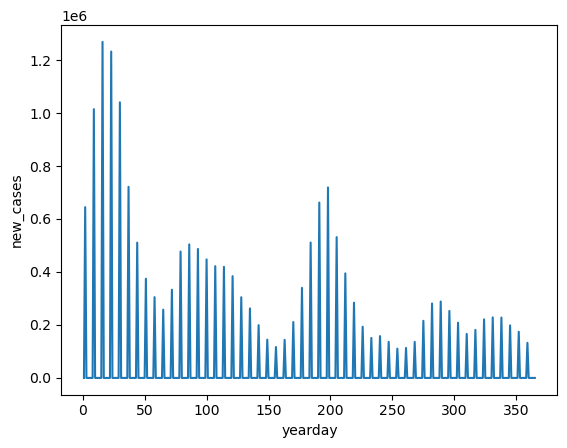

In [31]:
sns.lineplot(data=italy22, x="yearday", y="new_cases")

In [29]:
italy22["new_cases_cum"]= italy22["new_cases"].cumsum()

C:\Users\zobom\AppData\Local\Temp\ipykernel_10280\2344165390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy22["new_cases_cum"]= italy22["new_cases"].cumsum()


In [39]:
italy22.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
yearday                                             int32
year                                                int32
new_cases_cum                                     float64
Length: 70, dtype: object

C:\Users\zobom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zobom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='yearday', ylabel='new_cases_cum'>

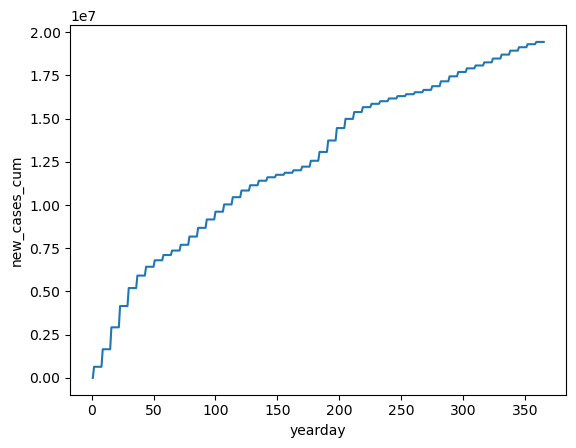

In [40]:
sns.lineplot(data=italy22, x="yearday", y="new_cases_cum")

 CI SONO SIMILARITA' TRA I DATI TOTALI E I DATI CUMULATIVI 2022. I CASI TOTALI SONO I DATI CUMMULATIVI DA INIZIO PANDEMIA

Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

In [65]:
period = covid_db[(covid_db["date"] >= "2022-05-01") & (covid_db["date"] <= "2023-04-30")]
eur3 = period[(period["location"] == "Italy") | (period["location"] == "Germany") | (period["location"] == "France")]
eur3.groupby("location")["icu_patients"].sum()

location
France     334457.0
Germany    373171.0
Italy       84408.0
Name: icu_patients, dtype: float64

In [62]:
import seaborn as sns

<Axes: xlabel='location', ylabel='icu_patients'>

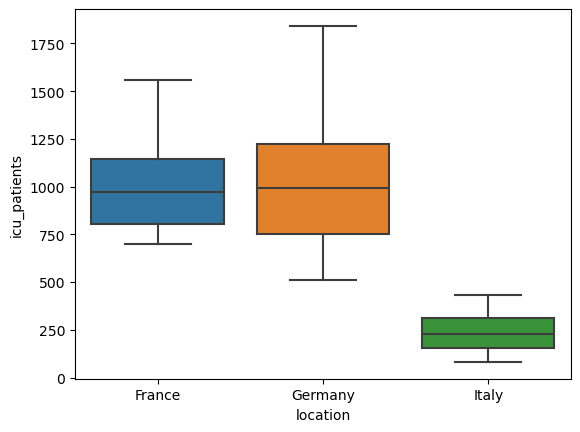

In [66]:
sns.boxplot(data=eur3, x="location", y= "icu_patients")

L'ITALIA HA AVUTO UN NUMERO MINORE DI PAZIENTI IN TERAPIA INTENSIVA RISPETTO A GERMANIA E UK. LA VARIABILITA' IN UK E' STATA MAGGIORE

Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna - se ci sono dati nulli, sugggerire se può essere possibile gestirli tramite sostituzione o meno.

In [70]:
period23 = covid_db[(covid_db["date"] >= "2023-01-01") & (covid_db["date"] <= "2023-12-31")]
eur4 = period23[(period23["location"] == "Italy") | (period23["location"] == "Germany") | (period23["location"] == "France") | (period23["location"] == "Spain")]
eur4.groupby("location")["icu_patients"].sum()

location
France      80049.0
Germany    124107.0
Italy       41534.0
Spain       20555.0
Name: icu_patients, dtype: float64

CI SONO MOLTE RIGHE NULLE. CONSIDERATO CHE 2023 SIAMO USCITI DALLA CRISI, SAREBBE DA CAPIRE PRIMA COME IN GENERALE SONO STATI RACCOLTI I DATI